<a href="https://colab.research.google.com/github/IshakCelik/My_IBM-Data-Science-Professional-Certificate-/blob/main/final_exam_by_Ishak_Celik_(Analyzing_Historical_Stock_Revenue_Data_and_Building_a_Dashboard).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analyzing Historical Stock/Revenue Data and Building a Dashboard

At this point please ensure you have completed the two previous yfinance and web scraping labs. In this assignment you will upload screenshots of your code and results. You will also be reviewing the submission for one of your peers and grading their work.

As a data scientist working for an investment firm, you will extract the revenue data for Tesla and GameStop and build a dashboard to compare the price of the stock vs the revenue.

**Grading criteria overview**

Full Points: Working code that yields correct results

You will be graded on the dashboards displaying the specified data and the screenshots you took during the final project lab questions. There are 12 possible points for this assignment. Here is the breakdown:

Question 1 - Extracting Tesla Stock Data Using yfinance - 2 Points

Question 2 - Extracting Tesla Revenue Data Using Webscraping - 1 Points

Question 3 - Extracting GameStop Stock Data Using yfinance - 2 Points

Question 4 - Extracting GameStop Revenue Data Using Webscraping - 1 Points

Question 5 - Tesla Stock and Revenue Dashboard - 2 Points

Question 6 - GameStop Stock and Revenue Dashboard- 2 Points

Question 7 - Sharing your Assignment Notebook - 2 Points

For each problem points will be awarded as follows:

Full Points: Working code that yields correct results

Partial Points: Partially correct code or results

No Points: Did not attempt the problem or did not upload any solution

**Example submissions**
Here are some examples of a submission clearly showing both the Code and its Results/Output when executed from a Jupyter Notebook.


Its a good idea to take a screenshot from the question header to the final output to capture everything.

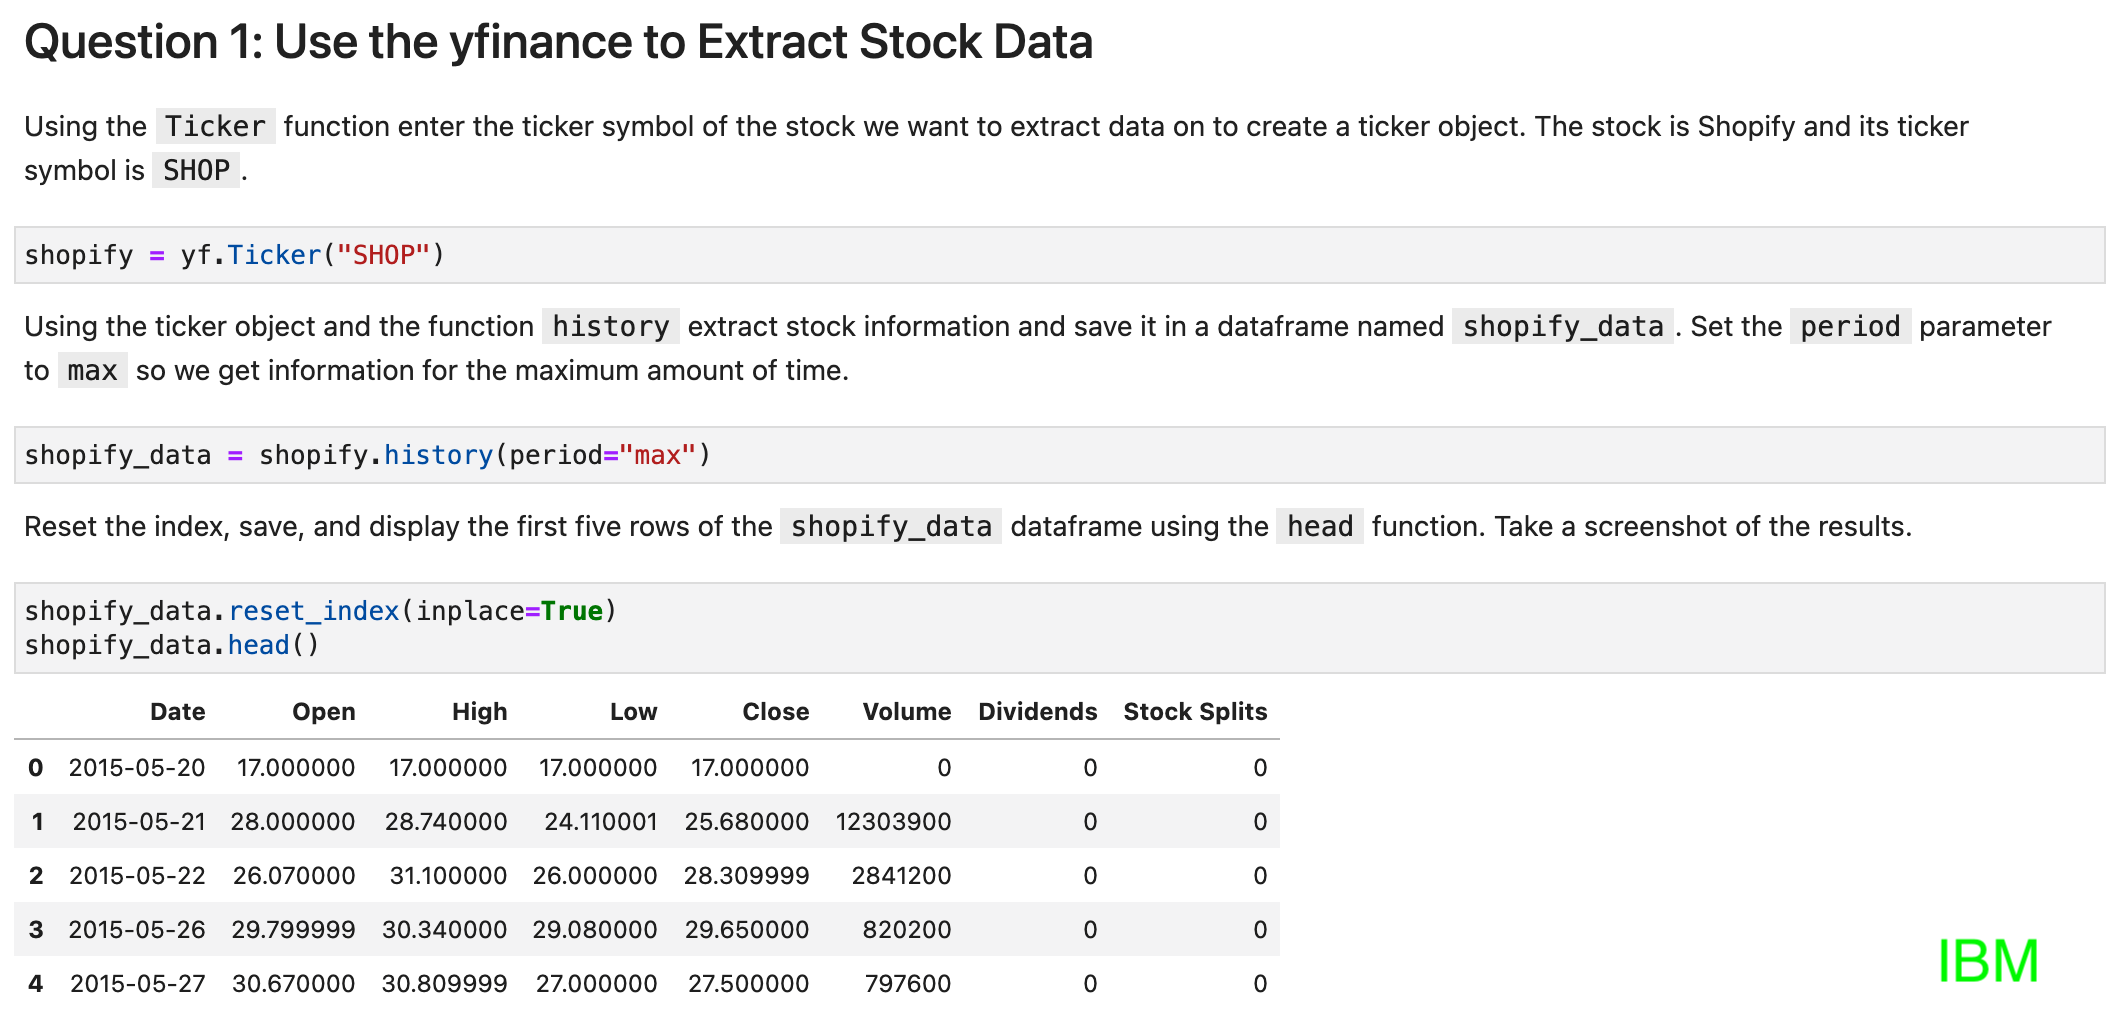

##importing necessary libraries

In [44]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px

Define Graphing Function

In [45]:
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    stock_data_specific = stock_data[stock_data.Date <= '2021--06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date, infer_datetime_format=True), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date, infer_datetime_format=True), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()

#Question 1 - Extracting Tesla Stock Data Using yfinance - 2 Points

In [46]:
# Use the Ticker function to create a ticker object by entering the stock's ticker symbol.
# In this example, we are retrieving data for Tesla, whose ticker symbol is "TSLA".
import yfinance as yf
# Create a ticker object for Tesla
tesla = yf.Ticker('TSLA')
# Use the ticker object and the history function to extract stock data.
# Set the period parameter to "max" to get data for the maximum time period available.
tesla_data = tesla.history(period="max")
# Reset the index of the dataframe to ensure the date is a column, not the index
tesla_data.reset_index(inplace=True)
# Display the first five rows of the dataframe
tesla_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


# Question 2: Use Webscraping to Extract Tesla Revenue Data

Use the requests library to download the webpage https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm Save the text of the response as a variable named html_data.

In [47]:
# We first retrieve the HTML data from the provided URL using the requests library,
# then parse it using BeautifulSoup. After that, we extract the table containing Tesla's
# Quarterly Revenue and store it in a DataFrame named tesla_revenue with the columns "Date" and "Revenue".
# Finally, we clean the "Revenue" column by removing commas and dollar signs,
# and filter out any null or empty values.
import requests
from bs4 import BeautifulSoup
import pandas as pd

# URL containing Tesla's quarterly revenue data
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"

# Fetch the HTML content from the URL
html_data = requests.get(url).text

# Parse the HTML data using BeautifulSoup
soup = BeautifulSoup(html_data, "html5lib")

# Initialize an empty DataFrame to store the extracted Tesla revenue data
tesla_revenue = pd.DataFrame(columns=["Date", "Revenue"])

# Loop through all tables and find the one that starts with "Tesla Quarterly Revenue"
for table in soup.find_all('table'):
    if table.find('th').getText().startswith("Tesla Quarterly Revenue"):
        for row in table.find("tbody").find_all("tr"):
            col = row.find_all("td")
            if len(col) != 2:
                continue
            Date = col[0].text.strip()
            Revenue = col[1].text.strip().replace("$", "").replace(",", "")
            # Create a temporary DataFrame for the row
            temp_df = pd.DataFrame({"Date": [Date], "Revenue": [Revenue]})
            # Concatenate the temporary DataFrame to tesla_revenue
            tesla_revenue = pd.concat([tesla_revenue, temp_df], ignore_index=True)

# Clean the Revenue column by removing commas and dollar signs
tesla_revenue["Revenue"] = tesla_revenue["Revenue"].str.replace(',|\$', "", regex=True)
# Remove any null values or empty strings from the Revenue column
tesla_revenue.dropna(inplace=True)
tesla_revenue = tesla_revenue[tesla_revenue["Revenue"] != ""]
# Display the last 5 rows of the tesla_revenue DataFrame
tesla_revenue.reset_index(inplace=True)
tesla_revenue.tail()

,index,Date,Revenue
48,48,2010-09-30,31
49,49,2010-06-30,28
50,50,2010-03-31,21
51,52,2009-09-30,46
52,53,2009-06-30,27


#Question 3 - Extracting GameStop Stock Data Using yfinance - 2 Points

In [48]:
# Use the Ticker function to create a ticker object by entering the stock's ticker symbol.
# In this example, we are retrieving data for GameStop, whose ticker symbol is "GME".
# Create a ticker object for GameStop
gme = yf.Ticker('GME')
# Use the ticker object and the history function to extract stock data.
# Set the period parameter to "max" to get data for the maximum time period available.
gme_data = gme.history(period="max")
# Reset the index of the dataframe to ensure the date is a column, not the index
gme_data.reset_index(inplace=True)
# Display the first five rows of the dataframe
gme_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620128,1.693350,1.603296,1.691667,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716073,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658001,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578048,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615920,1.662210,1.603296,1.662210,6892800,0.0,0.0


#Question 4: Use Webscraping to Extract GME Revenue Data###
Use the requests library to download the webpage https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html. Save the text of the response as a variable named html_data.



<details><summary>Click here if you need help locating the table</summary>

```
    
Below is the code to isolate the table, you will now need to loop through the rows and columns like in the previous lab
    
soup.find_all("tbody")[1]
    
If you want to use the read_html function the table is located at index 1


```

</details>


In [49]:
# We first retrieve the HTML data from the provided URL using the requests library,
# then parse it using BeautifulSoup. After that, we extract the table containing GameStop's
# Quarterly Revenue and store it in a DataFrame named gme_revenue with the columns "Date" and "Revenue".
# Finally, we clean the "Revenue" column by removing commas and dollar signs,
# and filter out any null or empty values.
import requests
from bs4 import BeautifulSoup
import pandas as pd
# URL containing GameStop's stock and revenue data
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"
# Fetch the HTML content from the URL
html_data = requests.get(url).text
# Parse the HTML data using BeautifulSoup
soup = BeautifulSoup(html_data, "html5lib")
# Initialize an empty DataFrame to store the extracted GameStop revenue data
gme_revenue = pd.DataFrame(columns=["Date", "Revenue"])
# Loop through all tables and find the one that starts with "GameStop Quarterly Revenue"
for table in soup.find_all('table'):
    if table.find('th').getText().startswith("GameStop Quarterly Revenue"):
        for row in table.find("tbody").find_all("tr"):
            col = row.find_all("td")
            if len(col) != 2:
                continue
            Date = col[0].text.strip()
            Revenue = col[1].text.strip().replace("$", "").replace(",", "")
            # Create a temporary DataFrame for the row
            temp_df = pd.DataFrame({"Date": [Date], "Revenue": [Revenue]})
            # Concatenate the temporary DataFrame to gme_revenue
            gme_revenue = pd.concat([gme_revenue, temp_df], ignore_index=True)
# Clean the Revenue column by removing commas and dollar signs
gme_revenue["Revenue"] = gme_revenue["Revenue"].str.replace(',|\$', "", regex=True)
# Remove any null values or empty strings from the Revenue column
gme_revenue.dropna(inplace=True)
gme_revenue = gme_revenue[gme_revenue["Revenue"] != ""]
# Reset the index and display the last 5 rows of the gme_revenue DataFrame
gme_revenue.reset_index(drop=True, inplace=True)
gme_revenue.tail()


,Date,Revenue
57,2006-01-31,1667
58,2005-10-31,534
59,2005-07-31,416
60,2005-04-30,475
61,2005-01-31,709


#QQuestion 5 - Tesla Stock and Revenue Dashboard - 2 Points
Use the make_graph function to graph the Tesla Stock Data, also provide a title for the graph. The structure to call the make_graph function is make_graph(tesla_data, tesla_revenue, 'Tesla'). Note the graph will only show data upto June 2021.

In [50]:
'''import matplotlib.pyplot as plt
import pandas as pd

def make_graph(stock_data, revenue_data, stock_name):
    # Convert 'Date' columns to datetime format (removing time zone if necessary)
    stock_data['Date'] = pd.to_datetime(stock_data['Date']).dt.date
    revenue_data['Date'] = pd.to_datetime(revenue_data['Date']).dt.date
    # Merge the stock and revenue data on the Date column
    merged_data = pd.merge(stock_data[['Date', 'Close']], revenue_data, on='Date', how='inner')
    # Create a figure and axis
    fig, ax1 = plt.subplots(figsize=(10, 6))
    # Plot stock prices
    ax1.plot(merged_data['Date'], merged_data['Close'], color='tab:blue', label='Stock Price')
    ax1.set_xlabel('Date')
    ax1.set_ylabel(f'{stock_name} Stock Price (USD)', color='tab:blue')
    ax1.tick_params(axis='y', labelcolor='tab:blue')
    # Create a second y-axis for the revenue
    ax2 = ax1.twinx()
    ax2.plot(merged_data['Date'], merged_data['Revenue'], color='tab:red', label='Revenue')
    ax2.set_ylabel(f'{stock_name} Revenue (in millions)', color='tab:red')
    ax2.tick_params(axis='y', labelcolor='tab:red')
    # Set the title and display the plot
    plt.title(f'{stock_name} Stock Price and Revenue Over Time')
    plt.show()
# Example usage of the function for Tesla
make_graph(tesla_data, tesla_revenue, 'Tesla')
'''

"import matplotlib.pyplot as plt\nimport pandas as pd\n\ndef make_graph(stock_data, revenue_data, stock_name):\n    # Convert 'Date' columns to datetime format (removing time zone if necessary)\n    stock_data['Date'] = pd.to_datetime(stock_data['Date']).dt.date\n    revenue_data['Date'] = pd.to_datetime(revenue_data['Date']).dt.date\n    # Merge the stock and revenue data on the Date column\n    merged_data = pd.merge(stock_data[['Date', 'Close']], revenue_data, on='Date', how='inner')\n    # Create a figure and axis\n    fig, ax1 = plt.subplots(figsize=(10, 6))\n    # Plot stock prices\n    ax1.plot(merged_data['Date'], merged_data['Close'], color='tab:blue', label='Stock Price')\n    ax1.set_xlabel('Date')\n    ax1.set_ylabel(f'{stock_name} Stock Price (USD)', color='tab:blue')\n    ax1.tick_params(axis='y', labelcolor='tab:blue')\n    # Create a second y-axis for the revenue\n    ax2 = ax1.twinx()\n    ax2.plot(merged_data['Date'], merged_data['Revenue'], color='tab:red', label='Re

#Question 5 - Tesla Stock and Revenue Dashboard - 2 Points

In [51]:
make_graph(tesla_data, tesla_revenue, 'Tesla');

<ipython-input-45-47a2266b7876>:5: UserWarning:

The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.

<ipython-input-45-47a2266b7876>:6: UserWarning:

The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.



#Question 6 - GameStop Stock and Revenue Dashboard- 2 Points

In [52]:
make_graph(gme_data, gme_revenue, 'GME');

<ipython-input-45-47a2266b7876>:5: UserWarning:

The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.

<ipython-input-45-47a2266b7876>:6: UserWarning:

The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.

